<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [55]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
from sklearn.metrics import jaccard_similarity_score, f1_score, log_loss, classification_report, confusion_matrix
import matplotlib.ticker as ticker
from sklearn import preprocessing, metrics, svm, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [56]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-07-12 18:24:27--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-07-12 18:24:27 (11.2 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [57]:
url_train = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv"
url_test = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv"
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
df_train.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [58]:
print("El dataframe de Entrenamiento es de = " + str(df_train.shape))
print("El dataframe de Prueba es de = " + str(df_test.shape))

El dataframe de Entrenamiento es de = (346, 10)
El dataframe de Prueba es de = (54, 10)


### Convert to date time object 

In [59]:
df_train['due_date'] = pd.to_datetime(df_train['due_date'])
df_train['effective_date'] = pd.to_datetime(df_train['effective_date'])
df_test['due_date'] = pd.to_datetime(df_test['due_date'])
df_test['effective_date'] = pd.to_datetime(df_test['effective_date'])
df_train.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [60]:
print("Dataset de Entrenamiento : ")
print(df_train['loan_status'].value_counts())
print("================================")
print("Dataset de Prueba : ")
print(df_test['loan_status'].value_counts())

Dataset de Entrenamiento : 
PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64
Dataset de Prueba : 
PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64


260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [61]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



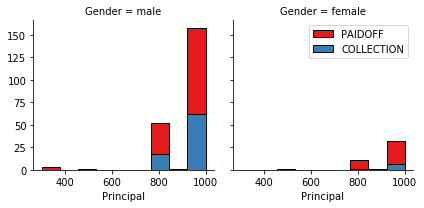

In [62]:
import seaborn as sns

bins = np.linspace(df_train.Principal.min(), df_train.Principal.max(), 10)
g = sns.FacetGrid(df_train, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

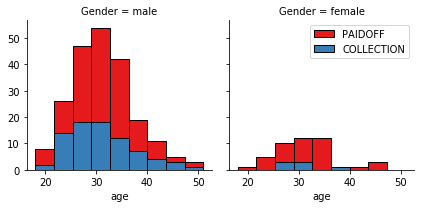

In [63]:
bins = np.linspace(df_train.age.min(), df_train.age.max(), 10)
g = sns.FacetGrid(df_train, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

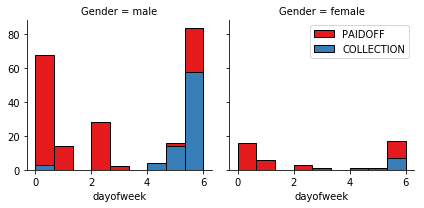

In [64]:
df_train['dayofweek'] = df_train['effective_date'].dt.dayofweek
df_test['dayofweek'] = df_test['effective_date'].dt.dayofweek
bins = np.linspace(df_train.dayofweek.min(), df_train.dayofweek.max(), 10)
g = sns.FacetGrid(df_train, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [65]:
df_train['weekend'] = df_train['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df_test['weekend'] = df_test['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df_train.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [66]:
print("Dataset de Entrenamiento : ")
print(df_train.groupby(['Gender'])['loan_status'].value_counts(normalize=True))
print("==================================")
print("Dataset de Prueba : ")
print(df_test.groupby(['Gender'])['loan_status'].value_counts(normalize=True))

Dataset de Entrenamiento : 
Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64
Dataset de Prueba : 
Gender  loan_status
female  PAIDOFF        0.727273
        COLLECTION     0.272727
male    PAIDOFF        0.744186
        COLLECTION     0.255814
Name: loan_status, dtype: float64


86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [67]:
df_train['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df_test['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df_train.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [68]:
print("Dataset de Entrenamiento : ")
print(df_train.groupby(['education'])['loan_status'].value_counts(normalize=True))
print("================================================")
print("Dataset de Prueba : ")
print(df_test.groupby(['education'])['loan_status'].value_counts(normalize=True))

Dataset de Entrenamiento : 
education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64
Dataset de Prueba : 
education             loan_status
Bechalor              PAIDOFF        1.000000
High School or Below  PAIDOFF        0.523810
                      COLLECTION     0.476190
Master or Above       PAIDOFF        1.000000
college               PAIDOFF        0.826087
                      COLLECTION     0.173913
Name: loan_status, dtype: float64


#### Feature befor One Hot Encoding

In [69]:
df_train[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [70]:
Feature_train = df_train[['Principal','terms','age','Gender','weekend']]
Feature_train = pd.concat([Feature_train,pd.get_dummies(df_train['education'])], axis=1)
Feature_train.drop(['Master or Above'], axis = 1,inplace=True)

Feature_test = df_test[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(df_test['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)

Feature_train.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [71]:
X_train = Feature_train
X_test = Feature_test
X_train[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [72]:
y_train = df_train['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
y_test = df_test['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
Y_train = df_train['loan_status']
Y_test = df_test['loan_status']

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [74]:
X_train= preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

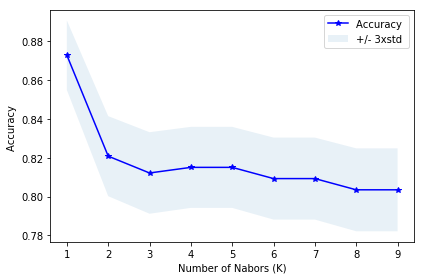

In [75]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_train)
    mean_acc[n-1] = metrics.accuracy_score(Y_train, yhat)

    std_acc[n-1]=np.std(yhat==Y_train)/np.sqrt(yhat.shape[0])
    
mean_acc    
plt.plot(range(1,Ks),mean_acc,'b*-')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [77]:
K_optimo = int(input("Ingrese el valor K optimo: "))
neigh_optimo = KNeighborsClassifier(n_neighbors = K_optimo).fit(X_train,Y_train)
Y_predict = neigh_optimo.predict(X_train)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))

Ingrese el valor K optimo: 6
Train set Accuracy:  0.8034682080924855


In [79]:
#Indice de JACCARD
print("El indice de JACCARD es : ", jaccard_similarity_score(Y_train, neigh_optimo.predict(X_train))) 
#Indice F1-score
print("El indice F1-score es : ", f1_score(Y_train, neigh_optimo.predict(X_train))) 
#Indice LogLoass
print("El indice LogLoass es : ", log_loss(Y_train, neigh_optimo.predict(X_train)))
print("Los datos mostrados son respecto al dataset de entrenamiento")

El indice de JACCARD es :  0.8092485549132948
El indice F1-score es :  0.875
El indice LogLoass es :  6.588407014939371
Los datos mostrados son respecto al dataset de entrenamiento


# Decision Tree

In [80]:
Decision_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Decision_Tree # it shows the default parameters
Decision_Tree.fit(Feature_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
predTree = Decision_Tree.predict(Feature_train)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_train, predTree))

DecisionTrees's Accuracy:  0.7514450867052023


In [82]:
#Indice de JACCARD
print("El indice de JACCARD es : ", jaccard_similarity_score(Y_train, predTree)) 
#Indice F1-score
print("El indice F1-score es : ", f1_score(Y_train, predTree)) 
#Indice LogLoass
print("El indice LogLoass es : ", log_loss(Y_train, predTree))
print("Los datos mostrados son respecto al dataset de entrenamiento")

El indice de JACCARD es :  0.7514450867052023
El indice F1-score es :  0.8552188552188552
El indice LogLoass es :  8.584967450163973
Los datos mostrados son respecto al dataset de entrenamiento


# Support Vector Machine

In [83]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train) 
Y_svm = clf.predict(X_train)

In [84]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_train, Y_svm, labels=[1,0]))

[[260   0]
 [ 83   3]]


Confusion matrix, without normalization
[[260   0]
 [ 83   3]]
Los datos mostrados son respecto al dataset de entrenamiento
El indice de JACCARD es :  0.7601156069364162
El indice F1-score es :  0.8623548922056385
El indice LogLoass es :  8.285505223596221


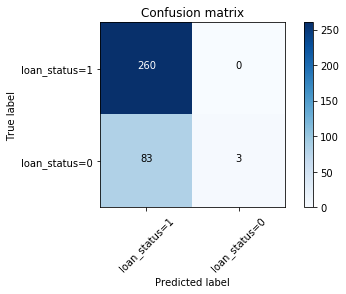

In [89]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train, Y_svm, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['loan_status=1','loan_status=0'],normalize= False,  title='Confusion matrix')
print("=====================================================================")
print("Los datos mostrados son respecto al dataset de entrenamiento")
#Indice de JACCARD
print("El indice de JACCARD es : ", jaccard_similarity_score(Y_train, Y_svm)) 
#Indice F1-score
print("El indice F1-score es : ", f1_score(Y_train, Y_svm)) 
#Indice LogLoass
print("El indice LogLoass es : ", log_loss(Y_train, Y_svm))
print("=====================================================================")


# Logistic Regression

In [90]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, Y_train)

Confusion matrix, without normalization
[[259   1]
 [ 86   0]]


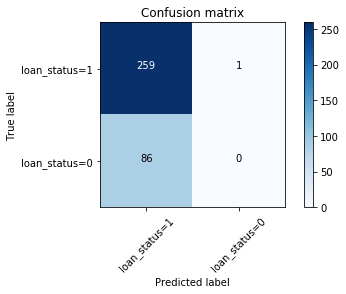

In [91]:
Y_prob = LR.predict(X_train)
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train, Y_prob, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['loan_status=1','loan_status=0'],normalize= False,  title='Confusion matrix')

In [93]:
#Indice de JACCARD
print("El indice de JACCARD es : ", jaccard_similarity_score(Y_train, Y_prob)) 
#Indice F1-score
print("El indice F1-score es : ", f1_score(Y_train, Y_prob)) 
#Indice LogLoass
print("El indice LogLoass es : ", log_loss(Y_train, Y_prob))
print("Los datos mostrados son respecto al dataset de entrenamiento")

El indice de JACCARD es :  0.7485549132947977
El indice F1-score es :  0.8561983471074379
El indice LogLoass es :  8.684804369179844
Los datos mostrados son respecto al dataset de entrenamiento


# Model Evaluation using Test set

In [94]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [95]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-07-12 18:34:47--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-07-12 18:34:47 (127 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [96]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [100]:
#K Nearest Neighbor(KNN)
Y_predict_test = neigh_optimo.predict(X_test)
J1 = jaccard_similarity_score(Y_test, Y_predict_test) 
F1 = f1_score(Y_test, Y_predict_test)
L1 = log_loss(Y_test, Y_predict_test)
#Decision Tree
predTree_test = Decision_Tree.predict(Feature_test)
J2 = jaccard_similarity_score(Y_test, predTree_test)
F2 = f1_score(Y_test, predTree_test)
L2 = log_loss(Y_test, predTree_test)

In [101]:
#Support Vector Machine
Y_svm_test = clf.predict(X_test)
J3 = jaccard_similarity_score(Y_test, Y_svm_test) 
F3 = f1_score(Y_test, Y_svm_test)
L3 = log_loss(Y_test, Y_svm_test)
#Logistic Regression
Y_prob_test = LR.predict(X_test)
J4 = jaccard_similarity_score(Y_test, Y_prob_test)
F4 = f1_score(Y_test, Y_prob_test) 
L4 = log_loss(Y_test, Y_prob_test)

In [103]:
RESULT = pd.DataFrame({'Algorithm' : ["KNN","Jaccard","F1-score","LogLoss"],
                      'Jaccard' : [J1, J2, J3, J4],
                      'F1-score' : [F1, F2, F3, F4],
                      'LogLoss' : [L1, L2, L3, L4]})
print("REPORTE FINAL DE LOS MODELOS DE ENTRENAMIENTO APLICADO AL DATASET DE PRUEBA")
RESULT.head()

REPORTE FINAL DE LOS MODELOS DE ENTRENAMIENTO APLICADO AL DATASET DE PRUEBA


,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.685185,0.790123,10.873452
1,Jaccard,0.759259,0.857143,8.315068
2,F1-score,0.722222,0.838710,9.594312
3,LogLoss,0.740741,0.851064,8.954705


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>